<a href="https://colab.research.google.com/github/pincesslucy/PECVD_OES/blob/main/oes0331_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/data/oes/230328_캡스톤디자인_OES/'

In [ ]:
file_list = os.listdir(path)
csv_list = []
for file_name in file_list:
    if file_name.endswith('.csv'):
        csv_list.append(file_name)

In [ ]:
run_list = []
for i, csv_file in enumerate(csv_list):
    file_path = os.path.join(path, csv_file)
    df = pd.read_csv(file_path)
    df = df.iloc[:, 1:]
    run_list.append(df)

In [ ]:
run_list[6].head()

,163.496,163.697,163.898,164.098,164.299,164.5,164.701,164.902,165.103,165.303,...,996.771,997.02,997.268,997.516,997.764,998.012,998.26,998.508,998.757,999.005
0,3370,3322,3394,3430,3306,3294,3286,3396,3415,3468,...,3278,3236,3218,3235,3242,3235,3302,3335,3340,3462
1,3531,3384,3451,3508,3422,3374,3431,3406,3509,3494,...,3411,3383,3382,3379,3362,3424,3478,3454,3371,3438
2,3367,3344,3344,3376,3386,3322,3342,3382,3338,3350,...,3212,3295,3322,3322,3217,3254,3271,3283,3261,3282
3,3364,3314,3354,3358,3369,3434,3394,3430,3378,3374,...,3339,3358,3323,3399,3306,3258,3290,3327,3275,3335
4,3386,3294,3339,3399,3387,3387,3430,3386,3355,3410,...,3236,3258,3226,3308,3338,3352,3370,3290,3234,3326


##전처리

In [ ]:
oxigen_list = []
for run in run_list:
  oxigen_list.append(run['777.365'])

<Figure size 1000x600 with 0 Axes>

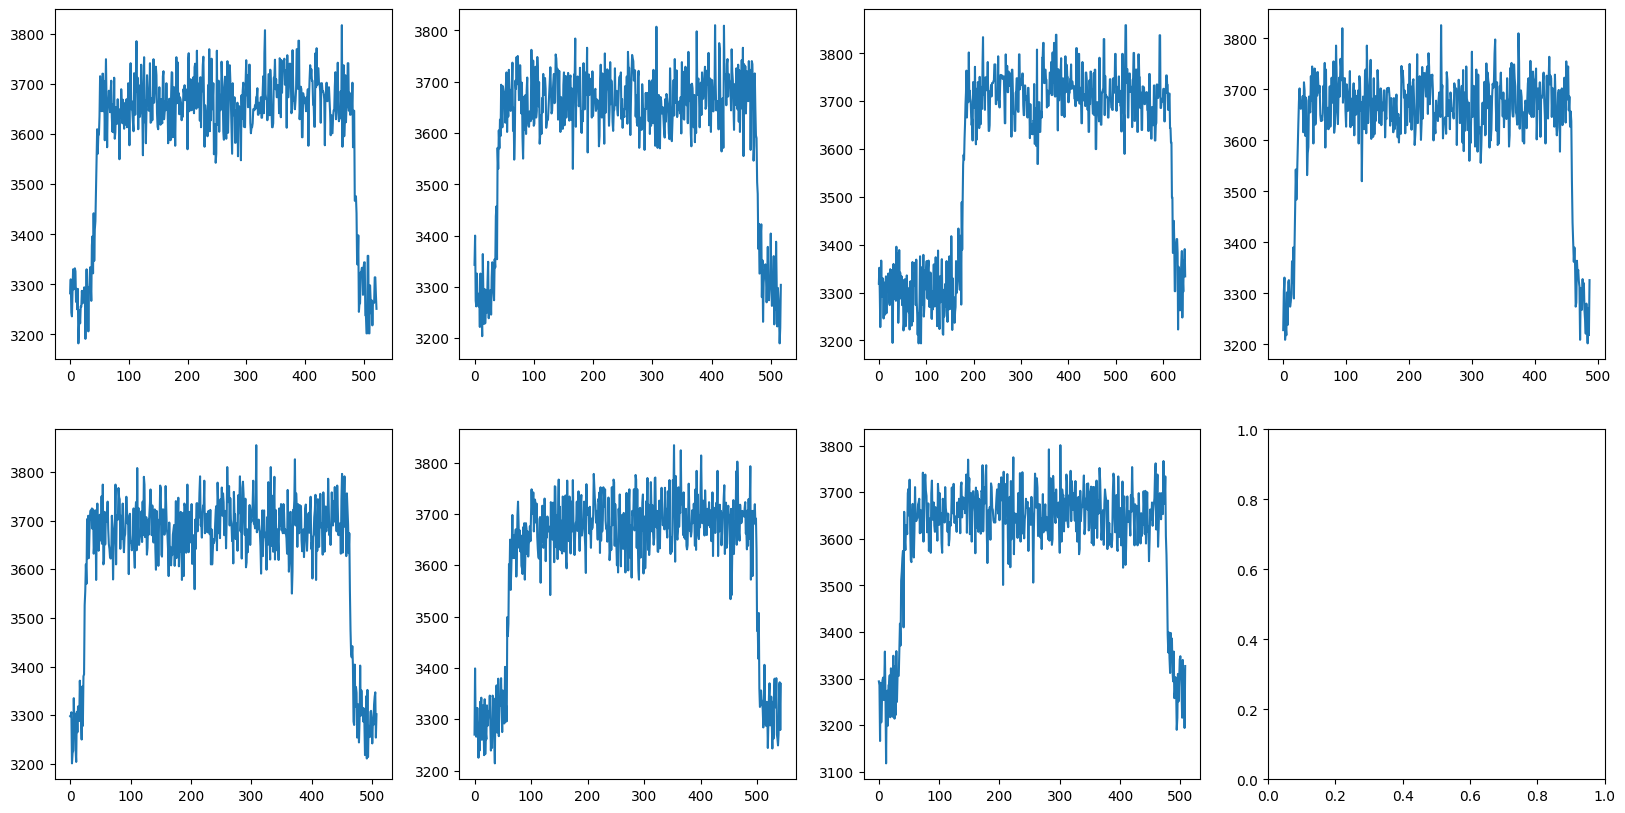

In [ ]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# 모든 데이터프레임을 각각 다른 그래프에 그리기
for i, df in enumerate(oxigen_list):
    row = i // 4  # 행 번호 계산
    col = i % 4   # 열 번호 계산
    ax = axes[row][col]  # 해당 서브플롯 선택
    ax.plot(df)  # 그래프 그리기
# 모든 그래프 출력

plt.show()

###공정 진행 부분만 추출 후 concat


<Axes: ylabel='777.365'>

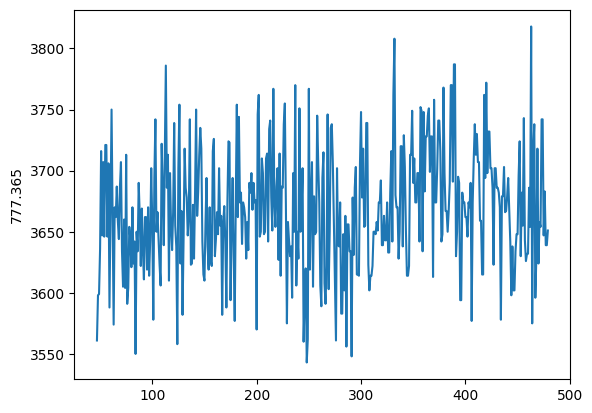

In [ ]:
main_run1 = run_list[0].iloc[47:480,:]
sns.lineplot(main_run1['777.365'])

<Axes: ylabel='777.365'>

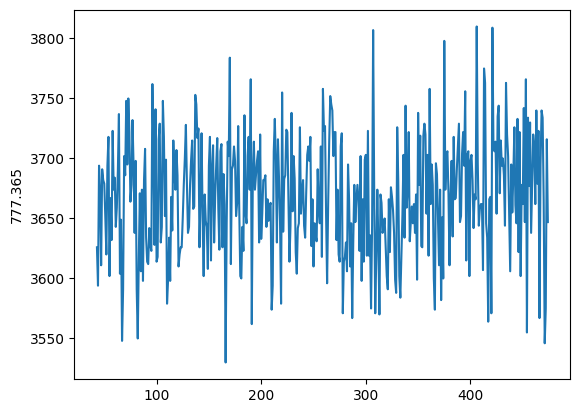

In [ ]:
main_run2 = run_list[1].iloc[43:475,:]
sns.lineplot(main_run2['777.365'])

<Axes: ylabel='777.365'>

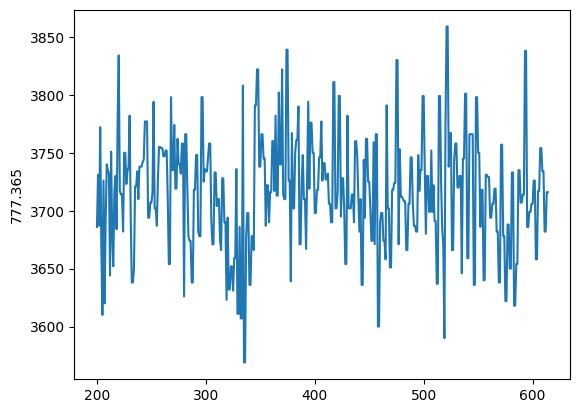

In [ ]:
main_run3 = run_list[2].iloc[200:615,:]
sns.lineplot(main_run3['777.365'])

<Axes: ylabel='777.365'>

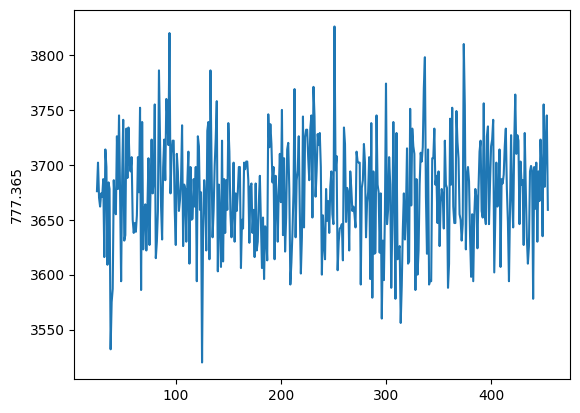

In [ ]:
main_run4 = run_list[3].iloc[25:455,:]
sns.lineplot(main_run4['777.365'])

<Axes: ylabel='777.365'>

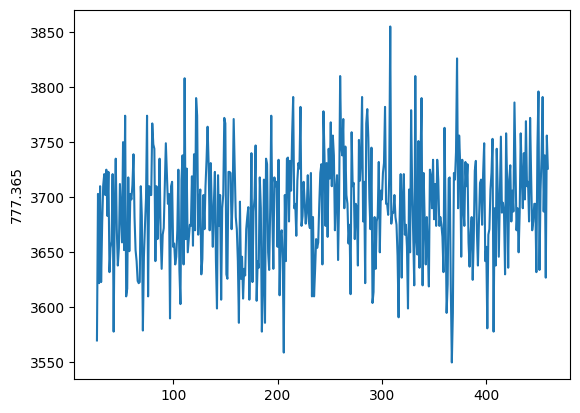

In [ ]:
main_run5 = run_list[4].iloc[27:460,:]
sns.lineplot(main_run5['777.365'])

<Axes: ylabel='777.365'>

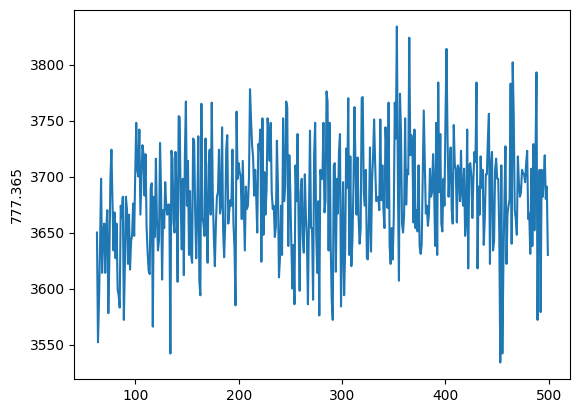

In [ ]:
main_run6 = run_list[5].iloc[63:500,:]
sns.lineplot(main_run6['777.365'])

<Axes: ylabel='777.365'>

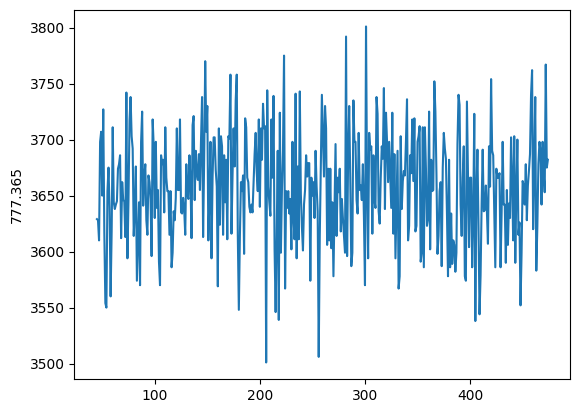

In [ ]:
main_run7 = run_list[6].iloc[45:475,:]
sns.lineplot(main_run7['777.365'])

In [ ]:
main_run_list = [main_run1, main_run2, main_run3, main_run4, main_run5, main_run6, main_run7]

# pd.concat 함수를 사용하여 리스트에 담긴 데이터프레임을 합칩니다.
all_main_run = pd.concat(main_run_list)

# 합친 데이터프레임을 출력합니다.
all_main_run

,163.496,163.697,163.898,164.098,164.299,164.5,164.701,164.902,165.103,165.303,...,996.771,997.02,997.268,997.516,997.764,998.012,998.26,998.508,998.757,999.005
47,3418,3430,3450,3480,3454,3384,3357,3350,3398,3391,...,3271,3242,3314,3358,3322,3311,3334,3326,3294,3310
48,3414,3363,3306,3366,3263,3295,3346,3346,3405,3382,...,3258,3250,3295,3323,3272,3363,3351,3312,3390,3341
49,3450,3314,3346,3323,3194,3222,3354,3399,3436,3410,...,3338,3300,3330,3406,3342,3339,3362,3375,3351,3378
50,3335,3282,3370,3392,3374,3349,3348,3311,3403,3419,...,3258,3246,3271,3327,3294,3338,3328,3318,3254,3359
51,3430,3447,3468,3398,3348,3378,3466,3446,3438,3518,...,3287,3280,3287,3362,3383,3295,3346,3394,3366,3404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,3435,3347,3340,3374,3343,3383,3375,3410,3375,3402,...,3283,3249,3260,3314,3290,3287,3307,3329,3282,3318
471,3354,3346,3389,3418,3346,3399,3422,3351,3386,3434,...,3236,3286,3303,3344,3324,3338,3350,3327,3314,3280
472,3382,3318,3378,3306,3306,3240,3250,3314,3298,3348,...,3212,3279,3282,3255,3212,3273,3276,3230,3262,3378
473,3278,3308,3319,3375,3362,3384,3371,3390,3355,3446,...,3330,3245,3243,3246,3254,3300,3298,3339,3279,3315


In [ ]:
main_run1['NO2/SiH4'] = 20
main_run1['thickness'] = 520.446
main_run1['refractive index'] = 1.505

main_run2['NO2/SiH4'] = 22
main_run2['thickness'] = 496.877
main_run2['refractive index'] = 1.497

main_run3['NO2/SiH4'] = 25
main_run3['thickness'] = 470.028
main_run3['refractive index'] = 1.488

main_run4['NO2/SiH4'] = 29
main_run4['thickness'] = 424.922
main_run4['refractive index'] = 1.47

main_run5['NO2/SiH4'] = 33
main_run5['thickness'] = 403.088
main_run5['refractive index'] = 1.452

main_run6['NO2/SiH4'] = 40
main_run6['thickness'] = 364.258
main_run6['refractive index'] = 1.439

main_run7['NO2/SiH4'] = 50
main_run7['thickness'] = 306.315
main_run7['refractive index'] = 1.443

<ipython-input-158-c7baa1ec745d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_run1['NO2/SiH4'] = 20
<ipython-input-158-c7baa1ec745d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_run1['thickness'] = 520.446
<ipython-input-158-c7baa1ec745d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [ ]:
main_run_list = [main_run1, main_run2, main_run3, main_run4, main_run5, main_run6, main_run7]
all_main_run = pd.concat(main_run_list)
all_main_run = all_main_run.reset_index(drop=True)
all_main_run

,163.496,163.697,163.898,164.098,164.299,164.5,164.701,164.902,165.103,165.303,...,997.516,997.764,998.012,998.26,998.508,998.757,999.005,NO2/SiH4,thickness,refractive index
0,3418,3430,3450,3480,3454,3384,3357,3350,3398,3391,...,3358,3322,3311,3334,3326,3294,3310,20,520.446,1.505
1,3414,3363,3306,3366,3263,3295,3346,3346,3405,3382,...,3323,3272,3363,3351,3312,3390,3341,20,520.446,1.505
2,3450,3314,3346,3323,3194,3222,3354,3399,3436,3410,...,3406,3342,3339,3362,3375,3351,3378,20,520.446,1.505
3,3335,3282,3370,3392,3374,3349,3348,3311,3403,3419,...,3327,3294,3338,3328,3318,3254,3359,20,520.446,1.505
4,3430,3447,3468,3398,3348,3378,3466,3446,3438,3518,...,3362,3383,3295,3346,3394,3366,3404,20,520.446,1.505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,3435,3347,3340,3374,3343,3383,3375,3410,3375,3402,...,3314,3290,3287,3307,3329,3282,3318,50,306.315,1.443
3006,3354,3346,3389,3418,3346,3399,3422,3351,3386,3434,...,3344,3324,3338,3350,3327,3314,3280,50,306.315,1.443
3007,3382,3318,3378,3306,3306,3240,3250,3314,3298,3348,...,3255,3212,3273,3276,3230,3262,3378,50,306.315,1.443
3008,3278,3308,3319,3375,3362,3384,3371,3390,3355,3446,...,3246,3254,3300,3298,3339,3279,3315,50,306.315,1.443


In [ ]:
X = all_main_run.iloc[:, :-1]
y = all_main_run['refractive index']

##시각화

###기본 분석석

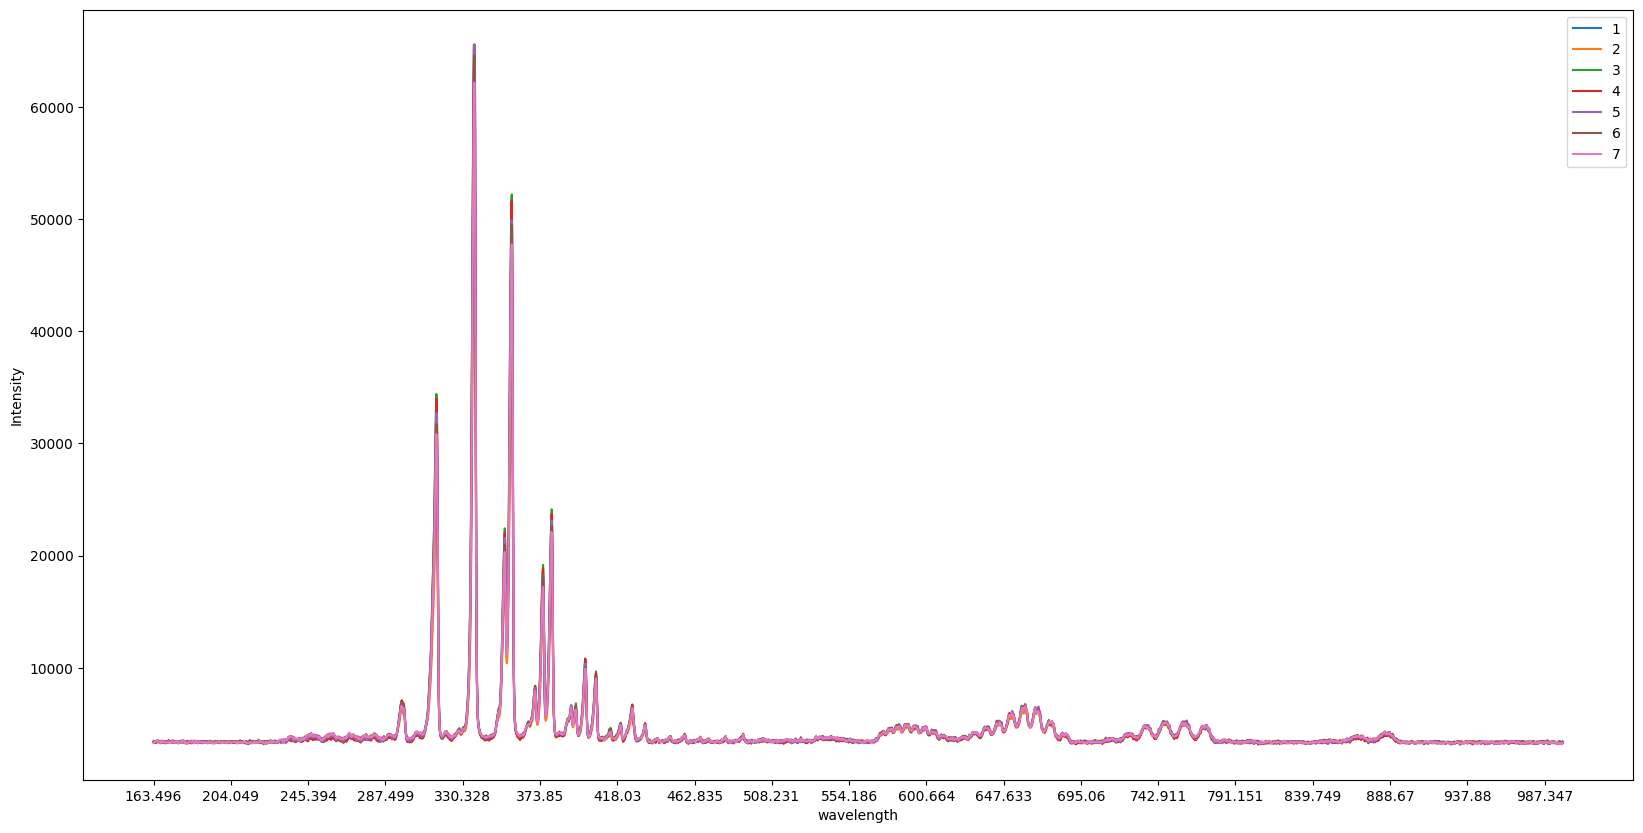

In [ ]:
# 그래프 옵션 설정
plt.figure(figsize=(20, 10))  # 그래프 크기 설정
plt.xlabel("wavelength")  # x축 라벨 설정
plt.ylabel("Intensity")  # y축 라벨 설정

# 모든 데이터프레임을 하나의 그래프에 그리기
for i, df in enumerate(run_list):
    plt.plot(df.iloc[df.max(axis=1).idxmax(), :], label=i+1)
# 범례 표시
total_len = len(df.iloc[df.max(axis=1).idxmax(), :].index)
plt.xticks(np.arange(0, total_len, 200))
plt.legend()
# 그래프 출력
plt.show()

<Figure size 1000x600 with 0 Axes>

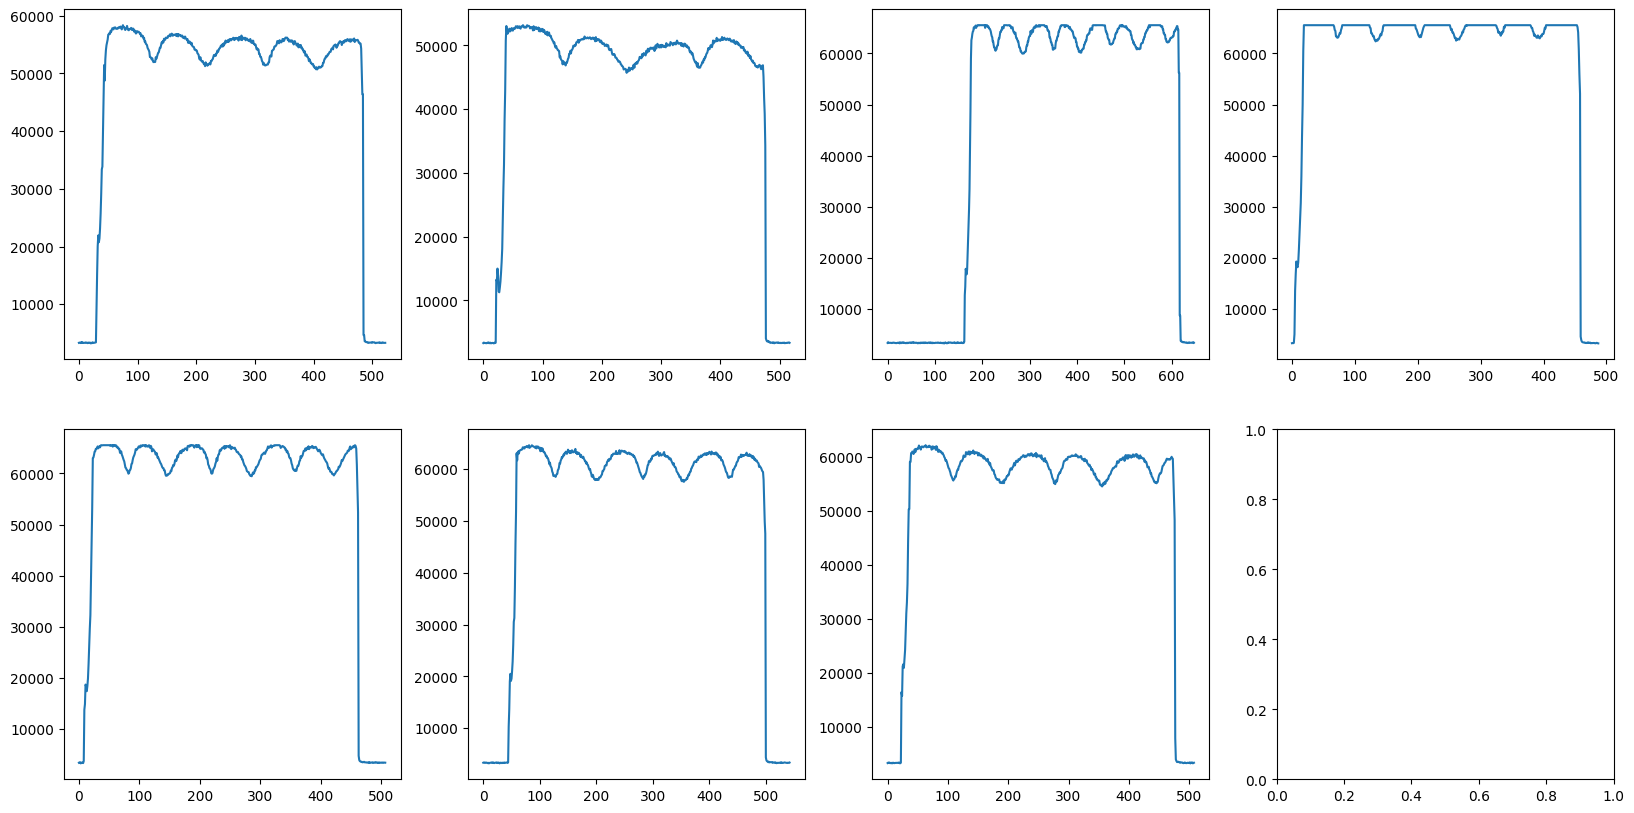

In [ ]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# 모든 데이터프레임을 각각 다른 그래프에 그리기
for i, df in enumerate(run_list):
    row = i // 4  # 행 번호 계산
    col = i % 4   # 열 번호 계산
    ax = axes[row][col]  # 해당 서브플롯 선택
    ax.plot(df[df.max(axis=0).idxmax()])  # 그래프 그리기
# 모든 그래프 출력

plt.show()

In [ ]:
main_var = all_main_run.iloc[:, -3:].drop_duplicates().reset_index(drop=True)
main_var

,NO2/SiH4,thickness,refractive index
0,20,520.446,1.505
1,22,496.877,1.497
2,25,470.028,1.488
3,29,424.922,1.470
4,33,403.088,1.452
5,40,364.258,1.439
6,50,306.315,1.443


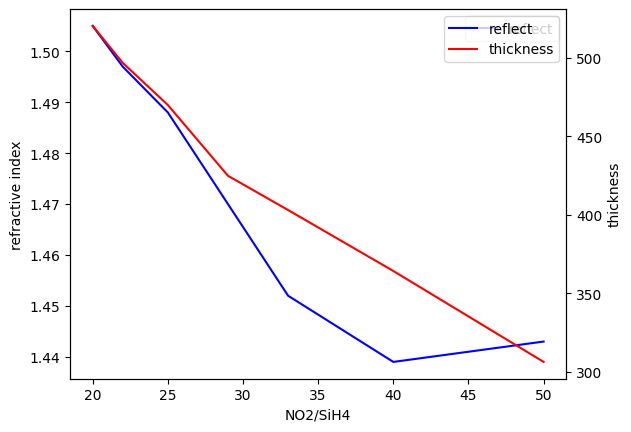

In [ ]:
# 그래프 생성
fig, ax1 = plt.subplots()

# 왼쪽 y축 설정
ax1.set_ylabel('refractive index')
sns.lineplot(x=main_var['NO2/SiH4'], y=main_var['refractive index'], ax=ax1, color='blue', label='reflect')

# 오른쪽 y축 설정
ax2 = ax1.twinx()
ax2.set_ylabel('thickness')
sns.lineplot(x=main_var['NO2/SiH4'], y=main_var['thickness'], ax=ax2, color='red', label='thickness')

# 범주 추가
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# 그래프 출력
plt.show()

###si/no ratio와 굴절률 분석석

NO파장 선택택

<Axes: >

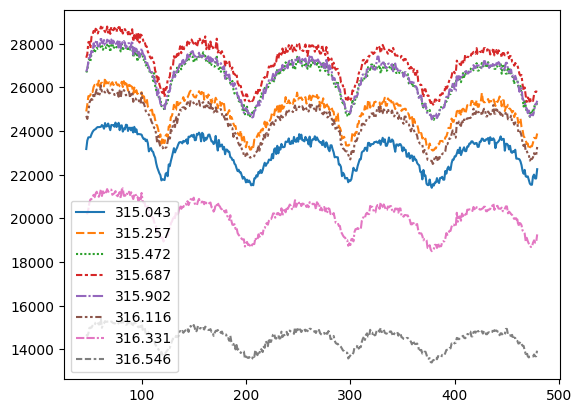

In [ ]:
sns.lineplot(main_run1.iloc[:, 729:737]) #NO: 315.687

In [ ]:
main_run1.max(axis=1).idxmax()

75

Si 파장 선택택

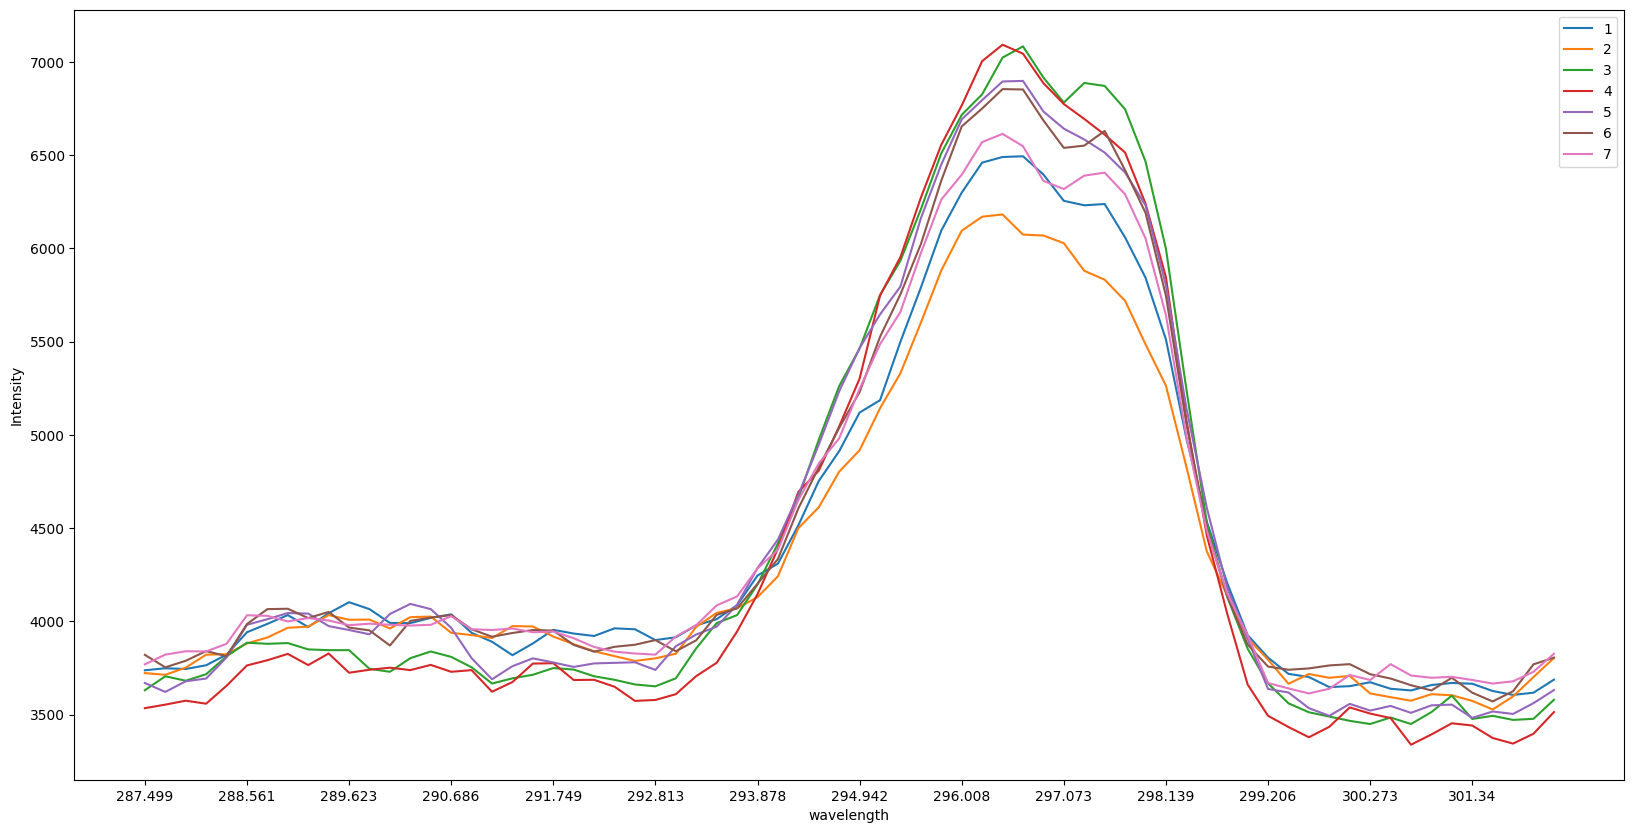

In [ ]:
# 그래프 옵션 설정
plt.figure(figsize=(20, 10))  # 그래프 크기 설정
plt.xlabel("wavelength")  # x축 라벨 설정
plt.ylabel("Intensity")  # y축 라벨 설정

# 모든 데이터프레임을 하나의 그래프에 그리기
for i, df in enumerate(run_list):
    plt.plot(df.iloc[df.max(axis=1).idxmax(), 600:670], label=i+1)
# 범례 표시
total_len = len(df.iloc[df.max(axis=1).idxmax(), 600:670].index)
plt.xticks(np.arange(0, total_len, 5))
plt.legend()
# 그래프 출력
plt.show()

si/no ratio와 굴절률 관계계

In [ ]:
main_run1.iloc[75,:].iloc[600:670].idxmax() #si: 296.434

'296.434'

In [ ]:
main_run1['296.434']

47     6179
48     6230
49     6247
50     6308
51     6430
       ... 
475    6381
476    6415
477    6374
478    6374
479    6326
Name: 296.434, Length: 433, dtype: int64

In [ ]:
print(main_run1['296.434'].idxmax())
print(main_run2['296.434'].idxmax())
print(main_run3['296.434'].idxmax())
print(main_run4['296.434'].idxmax())
print(main_run5['296.434'].idxmax())
print(main_run6['296.434'].idxmax())
print(main_run7['296.434'].idxmax())

80
48
400
39
452
490
62


In [ ]:
print(main_run1['315.687'].idxmax())
print(main_run2['315.687'].idxmax())
print(main_run3['315.687'].idxmax())
print(main_run4['315.687'].idxmax())
print(main_run5['315.687'].idxmax())
print(main_run6['315.687'].idxmax())
print(main_run7['315.687'].idxmax())

77
66
535
284
43
78
56


In [ ]:
print(main_run1.max(axis=1).idxmax())
print(main_run2.max(axis=1).idxmax())
print(main_run3.max(axis=1).idxmax())
print(main_run4.max(axis=1).idxmax())
print(main_run5.max(axis=1).idxmax())
print(main_run6.max(axis=1).idxmax())
print(main_run7.max(axis=1).idxmax())

75
67
200
25
27
81
63


In [ ]:
run1_si_no_ratio = main_run1['288.561'].loc[77] / main_run1['315.687'].loc[77]
print(run1_si_no_ratio)

run2_si_no_ratio = main_run2['288.561'].loc[66] / main_run2['315.687'].loc[66]
print(run2_si_no_ratio)

run3_si_no_ratio = main_run3['288.561'].loc[535] / main_run3['315.687'].loc[535]
print(run3_si_no_ratio)

run4_si_no_ratio = main_run4['288.561'].loc[284] / main_run4['315.687'].loc[284]
print(run4_si_no_ratio)

run5_si_no_ratio = main_run5['288.561'].loc[43] / main_run5['315.687'].loc[43]
print(run5_si_no_ratio)

run6_si_no_ratio = main_run6['288.561'].loc[78] / main_run6['315.687'].loc[78]
print(run6_si_no_ratio)

run7_si_no_ratio = main_run7['288.561'].loc[56] / main_run7['315.687'].loc[56]
print(run7_si_no_ratio)


0.1376280604271575
0.14955340388801322
0.11107125117280203
0.11138796081318308
0.11891206230272279
0.12348096348096348
0.1287276020441167


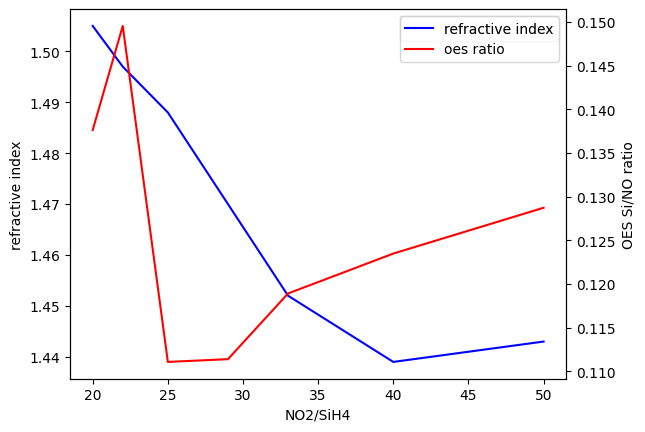

In [ ]:
# 그래프 생성
fig, ax1 = plt.subplots()

# 왼쪽 y축 설정
ax1.set_ylabel('refractive index')
sns.lineplot(x=main_var['NO2/SiH4'], y=main_var['refractive index'], ax=ax1, color='blue', label='refractive index')

# 오른쪽 y축 설정
ax2 = ax1.twinx()
ax2.set_ylabel('OES Si/NO ratio')
sns.lineplot(x=main_var['NO2/SiH4'], y=[run1_si_no_ratio, run2_si_no_ratio, run3_si_no_ratio, run4_si_no_ratio, run5_si_no_ratio, run6_si_no_ratio, run7_si_no_ratio], ax=ax2, color='red', label='oes ratio')

# 범주 추가
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# 그래프 출력
plt.show()

##학습

###pca 및 rf학습

data split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

min-max

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from lightgbm.sklearn import LGBMClassifier

pipeline

In [ ]:
pipe_model = Pipeline([
               ('pca', PCA(n_components=0.95)),
               ('model', RandomForestClassifier())
            ])

하이퍼파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV
hyper_param = {'model__n_estimators': [50, 100],
              'model__max_depth': [10, None],
              'model__min_samples_leaf': [2, 4]}

grid_model = GridSearchCV(pipe_model, param_grid=hyper_param, cv=5, n_jobs=-1, scoring='accuracy')
grid_model.fit(X_train, y_train)
best_model = grid_model.best_estimator_

하이퍼파라미터 튜닝 결과

In [ ]:
print(grid_model.best_params_)
print(grid_model.best_score_)

{'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__n_estimators': 100}
0.9307021197554907


예측결과

In [ ]:
from sklearn.metrics import accuracy_score
y_test_pred = best_model.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9302325581395349

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          80       0.88      0.89      0.89       136
         100       0.94      0.87      0.90       126
         120       0.93      0.94      0.93       125
         140       0.92      0.90      0.91       117
         160       0.97      0.96      0.97       120
         180       0.97      0.99      0.98       142
         200       0.90      0.96      0.93       137

    accuracy                           0.93       903
   macro avg       0.93      0.93      0.93       903
weighted avg       0.93      0.93      0.93       903



###lgbm

In [ ]:
from sklearn.preprocessing import MinMaxScaler
pipe_model = Pipeline([
               ('scaler', MinMaxScaler()),
               ('pca', PCA(n_components=0.95)),
               ('model', LGBMClassifier())
            ])

In [ ]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=0.95)),
                ('model', LGBMClassifier())])

In [ ]:
from sklearn.metrics import classification_report
y_train_pred = pipe_model.predict(X_train)
y_test_pred = pipe_model.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          80       1.00      1.00      1.00       294
         100       1.00      1.00      1.00       311
         120       1.00      1.00      1.00       308
         140       1.00      1.00      1.00       313
         160       1.00      1.00      1.00       295
         180       1.00      1.00      1.00       290
         200       1.00      1.00      1.00       296

    accuracy                           1.00      2107
   macro avg       1.00      1.00      1.00      2107
weighted avg       1.00      1.00      1.00      2107

              precision    recall  f1-score   support

          80       1.00      0.99      0.99       136
         100       0.99      0.99      0.99       126
         120       1.00      0.96      0.98       125
         140       0.97      1.00      0.98       117
         160       1.00      1.00      1.00       120
         180       0.99      0.99      0.99       142
         200       0.98 

###lgbmLigressor

In [ ]:
from lightgbm.sklearn import LGBMRegressor

In [ ]:
pipe_model = Pipeline([
               ('scaler', MinMaxScaler()),
               ('pca', PCA(n_components=0.95)),
               ('model', LGBMRegressor())
            ])

In [ ]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=0.95)),
                ('model', LGBMRegressor())])

In [ ]:
from sklearn.metrics import mean_squared_error


y_train_pred = pipe_model.predict(X_train)
y_test_pred = pipe_model.predict(X_test)

print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

4.528708822974399
48.59321370282478
